In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re



In [4]:
df = pd.read_csv('team8_dataset_1nt22cs091.csv')
def extract_mentions(tweet):
    return re.findall(r"@\w+", tweet)

G = nx.DiGraph()

for index, row in df.iterrows():
    user = row["ScreenName"]
    mentions = extract_mentions(row['OriginalTweet'])
    for mention in mentions:
        mention_user = mention[1:] 
        G.add_edge(user, mention_user)


print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
        

Number of nodes: 1690
Number of edges: 1200


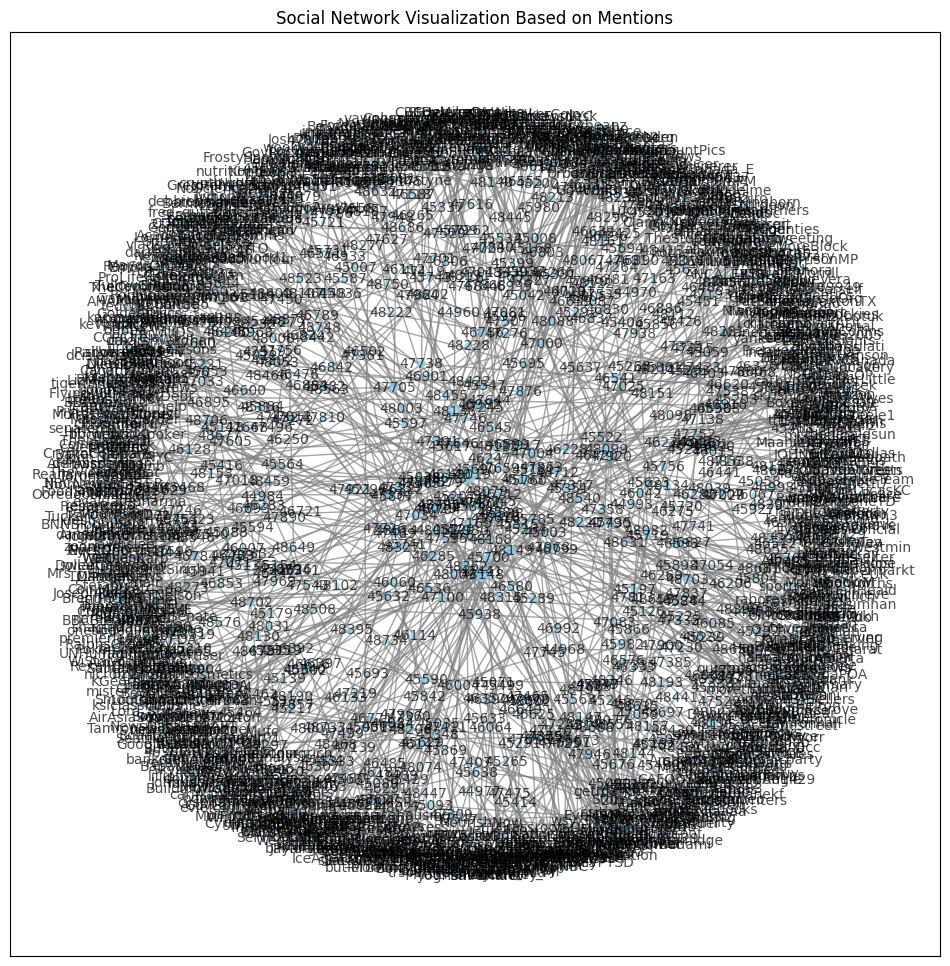

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G)

nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality') 
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

plt.figure(figsize=(12, 12)) 
pos = nx.spring_layout(G, k=0.1)   #k is used controls the optimal distance between nodes in the layout

node_size = [v * 10000 for v in degree_centrality.values()]  #computes the sizes of nodes based on their degree centrality

nx.draw_networkx(G, pos, node_size=node_size, with_labels=True, node_color='skyblue', edge_color='gray', alpha=0.7, font_size=10)
plt.title("Social Network Visualization Based on Mentions")
plt.show()


In [8]:
import networkx as nx

def greedy_influence_maximization(G, k):
    selected_nodes = []
    for _ in range(k):
        max_influence = 0
        best_node = None

        for node in set(G.nodes()) - set(selected_nodes):
            influence = sum(nx.single_source_shortest_path_length(G, node).values())
            if influence > max_influence:
                max_influence = influence
                best_node = node

        selected_nodes.append(best_node)

    return selected_nodes
k = 5  

influencers = greedy_influence_maximization(G, k)

print(f"Top {k} influencers for influence maximization: {influencers}")


Top 5 influencers for influence maximization: [48019, 48148, 48136, 46593, 48099]


In [10]:
def get_top_k_nodes(centrality_dict, k):
    return sorted(centrality_dict, key=centrality_dict.get, reverse=True)[:k]

k = 5
top_k_nodes = get_top_k_nodes(degree_centrality, k)

print(f"Top {k} influencers based on degree centrality: {top_k_nodes}")


Top 5 influencers based on degree centrality: ['realDonaldTrump', 48019, 48148, 'sainsburys', 'amazon']
